In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import cartopy
import cartopy.crs as ccrs
import matplotlib.path as mpath
import Contour_plot 
from Contour_plot import ctr_plot

#Set data directory
data_dir = 'data/'


#Call SOCCOM data
#Full snapshot
SOCCOM = pd.read_pickle('data/SOCCOM_snapshot.pkl')
subset = pd.read_pickle('data/unique_subset.pkl')
SOCCOM_eddy = pd.read_pickle('data/SOCCOM_eddy_matchups.pkl')

#Define SOCCOM variables in simplier terms
DIC = 'DIC_LIAR[µmol/kg]'
TA = 'TALK_LIAR[µmol/kg]'
salinity = 'Salinity[pss]'
oxygen = 'Oxygen[µmol/kg]'
oxygen_sat = 'OxygenSat[%]'
nitrate = 'Nitrate[µmol/kg]'
chl_a = 'Chl_a_corr[mg/m^3]'
pH = 'pHinsitu[Total]'
pCO2 = 'pCO2_LIAR[µatm]'
lat = 'Lat [°N]'
lon = 'Lon [°E]'

In [2]:
#import matplotlib.pyplot as plt
#import pandas as pd 
#import numpy as np
#import cartopy
#import cartopy.crs as ccrs
#import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime 


def ctr_plot (df, df_eddy, float_ID, x_var, y_var, z_var,duplicates):
    """
    Inputs
    ----------
    df (pandas.dataframe): pkl of SOCCOM data
    df_eddy (pandas.dataframe): plk of eddy data from matchups between SOCCOM data and eddy trajectories
    fload_ID (str): Cruise number of floats
    x_var (str): variable on x-axis of contour plot
    y_var (str): variable on y-axis of contour plot
    z_var (str): variable on z-axis of contour plot
    
    Returns: tricontour plot 
    
    """
    
    #for k, value in kwargs.items():
        #if 
    
    # Create SOCCOM subset for given cruise #
    flt = df.loc[df['Cruise'] == float_ID]
    Subset = flt[pd.notna(df[z_var])]
    
    # Get eddy location
    eddy_ID_cyclonic = df_eddy.loc[
        (df_eddy['eddy_type'] != 0) & 
        (df_eddy['Cruise'] == float_ID) & 
        (df_eddy['eddy_type'] == -1)
    ]
    eddy_ID_anticyclonic = df_eddy.loc[(df_eddy['eddy_type'] != 0) & (df_eddy['Cruise'] == float_ID) & 
                                  (df_eddy['eddy_type'] == 1)]
    
    eddy_length_cyclonic = len(eddy_ID_cyclonic)
    eddy_y_cyclonic = [10] * eddy_length_cyclonic
    
    eddy_length_anticyclonic = len(eddy_ID_anticyclonic)
    eddy_y_anticyclonic = [10] * eddy_length_anticyclonic

    #a_seen = []
    #a_dupes = []
    #c_seen = []
    #c_dupes = []
    
    #if duplicates == True:
        #for f in eddy_ID_anticyclonic['eddy_ID']:
            #if f in seen:
                #a_dupes.append(x)
            #else:
                #a_seen.append(x)
        #for f in eddy_ID_cyclonic['eddy_ID']:
            #if f in c_seen:
                #c_dupes.append(x)
            #else:
                #c_seen.append(x)
        
    
    fig, ax = plt.subplots(1,1)
    
    ct = ax.tricontourf(Subset[x_var], Subset[y_var], Subset[z_var])
    plt.gca().invert_yaxis()
    
    cbar = fig.colorbar(ct)
    cbar.set_label(z_var, rotation=270, labelpad=15)
    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)
    plt.ylim(bottom = 250)
    plt.xlim([0,40])
    
    plt.scatter(
        Subset[x_var], 
        Subset['Depth[m]'], 
        s=0.25, 
        c='black', 
        alpha=0.1,
    ) 
    
    plt.scatter(eddy_ID_cyclonic[x_var], eddy_y_cyclonic, c='red', s =20)
    plt.scatter(eddy_ID_anticyclonic[x_var], eddy_y_anticyclonic, c='blue', s =20)
    #plt.scatter(c_dupes[x_var], c_dupes, c='black', s =20)
    #plt.scatter(a_dupes[x_var], a_dupes, c='black', s =20)
    
    #plt.scatter(dupe_1[x_var], dupe_1, c='red', s =20)
    
    #print(Subset)
    
    return plt.show(), eddy_ID_cyclonic, eddy_ID_anticyclonic



/var/folders/l9/7zbywdnj5_3448lb_wpzv3t40000gp/T/ipykernel_1041/1891344561.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Subset = flt[pd.notna(df[z_var])]


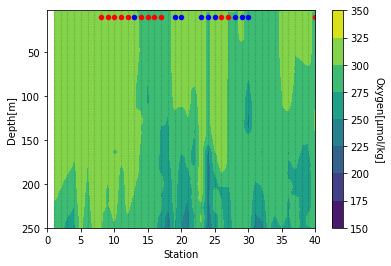

1273716    14
1273785    15
1273845    16
1273981    18
2060729     9
2060792    10
2060856    11
2060919    12
Name: Station, dtype: int64


In [42]:
float_ID = 5905073
x_var = 'Station'
y_var = 'Depth[m]'
z_var = oxygen
duplicates = []

test = ctr_plot(SOCCOM, SOCCOM_eddy, float_ID, x_var, y_var, z_var, duplicates ==True)

print(SOCCOM_eddy['Station'].loc[SOCCOM_eddy['eddy_ID'] == 182518])

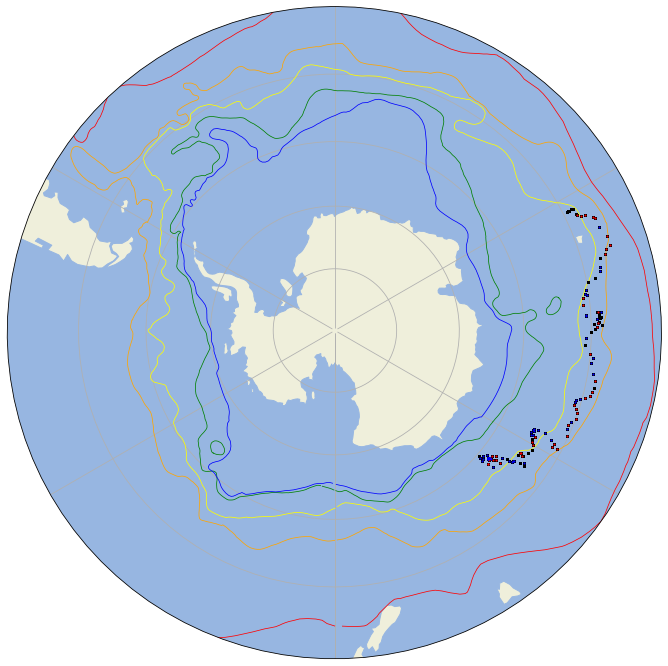

In [43]:
#Define orsi fronts
def load_orsi_fronts(data_dir):
    # Import the Southern Ocean fronts for mapping
    stf = pd.read_csv(data_dir + 'fronts/stf.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    saf = pd.read_csv(data_dir + 'fronts/saf.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    pf = pd.read_csv(data_dir + 'fronts/pf.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    saccf = pd.read_csv(data_dir + 'fronts/saccf.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    sbdy = pd.read_csv(data_dir + 'fronts/sbdy.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    
    return stf,saf,pf,saccf,sbdy

stf, saf, pf, saccf, sbdy = load_orsi_fronts(data_dir)


#Plot specific float

SOCCOM_float = SOCCOM.loc[SOCCOM['Cruise'] == float_ID]
eddy_ID_cyclonic = SOCCOM_eddy.loc[(SOCCOM_eddy['eddy_type'] != 0) & (SOCCOM_eddy['Cruise'] == float_ID) & 
                                  (SOCCOM_eddy['eddy_type'] == -1)]
eddy_ID_anticyclonic = SOCCOM_eddy.loc[(SOCCOM_eddy['eddy_type'] != 0) & (SOCCOM_eddy['Cruise'] == float_ID) & 
                                  (SOCCOM_eddy['eddy_type'] == 1)]

plt.figure(figsize =(12,12))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180,180,-90,-40], ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.gridlines(ccrs.PlateCarree(), draw_labels=True)

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform = ax.transAxes)
plt.plot(stf['lon'], stf['lat'], color='Red', transform=ccrs.PlateCarree(), linewidth=.75)
plt.plot(saf['lon'], saf['lat'], color='Orange', transform=ccrs.PlateCarree(), linewidth=.75)
plt.plot(pf['lon'], pf['lat'], color='Yellow', transform=ccrs.PlateCarree(), linewidth=.75)
plt.plot(saccf['lon'], saccf['lat'], color='Green', transform=ccrs.PlateCarree(), linewidth=.75)
plt.plot(sbdy['lon'], sbdy['lat'], color='Blue', transform=ccrs.PlateCarree(), linewidth=.75)


plt.scatter(SOCCOM_float['Lon [°E]'], SOCCOM_float['Lat [°N]'], color = 'Black', edgecolor = 'black', transform=ccrs.PlateCarree(), s=1, zorder=1001)
plt.scatter(eddy_ID_cyclonic['Lon [°E]'], eddy_ID_cyclonic['Lat [°N]'],c='red', edgecolor = 'red', transform=ccrs.PlateCarree(), s=1, zorder=1001)
plt.scatter(eddy_ID_anticyclonic['Lon [°E]'], eddy_ID_anticyclonic['Lat [°N]'],c='blue', edgecolor = 'blue', transform=ccrs.PlateCarree(), s=1, zorder=1001)

In [5]:
floatID_ed = SOCCOM_eddy['Cruise'].unique()  # cruise col is float_id

#ed = SOCCOM.loc[SOCCOM['Cruise'] == floatID_ed]
print(floatID_ed)

# Find float ID of a specific eddy_ID
#ed = SOCCOM.loc[SOCCOM['eddy_ID'] == float_number]

[5905997 5905370 5906006 5905071 5906307 5904761 5906227 5905639 5905369
 5904658 5906246 5905130 5904188 5904396 5906244 5905132 5906039 5904763
 5906225 5904683 5905995 5906218 5905073 5906305 5905372 5906004 5904687
 5906221 5904767 5905376 5906000 5905077 5905991 5904855 5904663 5906205
 5906318 5906207 5905134 5904857 5904661 5905109 5905075 5905374 5906002
 5905993 5906223 5904678 5904685 5904765 5906245 5905133 5904397 5905072
 5906304 5905373 5906040 5906005 5905994 5906219 5906224 5904682 5906226
 5905638 5905371 5906007 5905070 5906306 5905996 5904478 5904659 5906247
 5905131 5905368 5904395 5905069 5904660 5905108 5904856 5906206 5905135
 5904764 5906222 5904679 5904684 5905992 5905074 5905375 5906003 5905377
 5906001 5905076 5904766 5904467 5904686 5906220 5906319 5906204 5904662
 5904854 5904693 5905106 5904858 5904472 5906315 5906208 5904183 5905985
 5904841 5906030 5904677 5906211 5906213 5905078 5905379 5904469 5906032
 5904768 5904843 5904675 5904688 5906317 5904181 59

In [6]:
t = SOCCOM_eddy['eddy_ID'].loc[SOCCOM['Cruise'] == 5906030]

seen = []
dupes = []

for x in t:
    if x in seen:
        dupes.append(x)
    else:
        seen.append(x)
            
print(dupes)

#for float ID #5906030
#Duplicates include...
#373769,374212,182518,183889,379027



[<xarray.DataArray 'eddy_ID' ()>
array(373769.)
Coordinates:
    time     datetime64[ns] 2019-05-16T04:09:00
    lat      float64 -52.45
    lon      float64 31.76, <xarray.DataArray 'eddy_ID' ()>
array(374212.)
Coordinates:
    time     datetime64[ns] 2019-05-21T01:31:00
    lat      float64 -51.86
    lon      float64 33.45, <xarray.DataArray 'eddy_ID' ()>
array(374212.)
Coordinates:
    time     datetime64[ns] 2019-05-26T04:20:00
    lat      float64 -51.42
    lon      float64 34.67, <xarray.DataArray 'eddy_ID' ()>
array(374212.)
Coordinates:
    time     datetime64[ns] 2019-05-31T01:17:00
    lat      float64 -51.58
    lon      float64 35.34, <xarray.DataArray 'eddy_ID' ()>
array(374212.)
Coordinates:
    time     datetime64[ns] 2019-06-05T04:21:00
    lat      float64 -52.2
    lon      float64 35.41, <xarray.DataArray 'eddy_ID' ()>
array(182518.)
Coordinates:
    time     datetime64[ns] 2019-07-10T01:41:00
    lat      float64 -52.39
    lon      float64 37.2, <xarray.DataArray

In [7]:
sel_flt = []

for f in floatID_ed:
    
    SOCCOM_float = SOCCOM.loc[SOCCOM['Cruise'] == f]  # gets SOCCOM data for this float_id
    eID = SOCCOM_eddy['eddy_ID'].loc[SOCCOM_eddy['Cruise'] == f]

    
    # check that there is enough float data in SOCCOM df
    # SOCCOM_float.unique
    has_enough_float_data = len(SOCCOM_float['Station'].unique()) >= 10
    
    # check presence of an eddy data
    eddy_length = len(
        SOCCOM_eddy.loc[
            (SOCCOM_eddy['eddy_type'] != 0) & 
            (SOCCOM_eddy['Cruise'] == f)
        ]
    )
    has_enough_eddy_data = eddy_length >= 1   
                                      
    # check that there is pH data at every point
    boolean_list = np.isnan(SOCCOM_float[pH])
    has_ph_data = all(boolean_list) == False
    
    seen = []
    dupes = []
    mult = []

    #check to see if there are any duplicated eddy IDs
    
    #for x in eID:
     #   if x in seen:
     #       dupes.append(x)
     #       mult.append(f)
     #   else:
     #       seen.append(x)
            
    #for i in mult:
       # if i == f:
       #     has_dupes = 1
       # else:
       #     has_dupes = 0
    
    if has_enough_float_data & has_enough_eddy_data & has_ph_data: #& has_dupes == 1 :
        ID = f
        sel_flt.append(ID)    
        
print(sel_flt)

[5905997, 5905370, 5905071, 5904761, 5906227, 5905639, 5905369, 5904658, 5904188, 5904396, 5905132, 5904763, 5904683, 5905372, 5905376, 5906000, 5905077, 5904663, 5905134, 5904857, 5904661, 5905109, 5905075, 5905374, 5904678, 5904685, 5904765, 5904397, 5905373, 5906219, 5906224, 5904682, 5905638, 5905070, 5905996, 5904659, 5905131, 5905368, 5904395, 5904660, 5905108, 5904856, 5905135, 5906222, 5904679, 5904684, 5906003, 5905377, 5906001, 5905076, 5904766, 5904686, 5904662, 5904854, 5904693, 5904472, 5905985, 5904841, 5906030, 5906213, 5905078, 5905379, 5904469, 5906032, 5904768, 5904675, 5904470, 5904983, 5904185, 5905983, 5904474, 5904695, 5906217, 5904671, 5906036, 5904673, 5905998, 5904187, 5904657, 5904674, 5904842, 5905079, 5905105, 5906209, 5904984, 5904859, 5904473, 5905107, 5906008, 5906035, 5904860, 5905367, 5904186, 5904980, 5904477, 5904184, 5904982, 5906216]


In [8]:
sel_flt_2 = []
for f in sel_flt:
    
    #find all eddy IDs within float f
    eID = SOCCOM_eddy['eddy_ID'].loc[SOCCOM_eddy['Cruise'] == f]
    
    seen = []
    dupes = []
    mult = []

    #check to see if there are any duplicated eddy IDs
    
    for x in eID:
        if x in seen:
            dupes.append(x)
            mult.append(f)
            print(f)
        else:
            seen.append(x)
            
    for i in mult:
        if i == f:
            ID = f
            sel_flt_2.append(ID)
                           
print(sel_flt_2)

5905997
5905370
5905370
5905370
5905370
5905370
5905370
5905370
5905370
5905370
5905370
5905370
5905370
5905370
5905370
5905370
5905370
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5905071
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904761
5904658
5904658
5904658
5904658
5904658
5904658
5904658
5904658
5904658
5904658


5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5904682
5905638
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905070
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5905996
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659
5904659


5904693
5904693
5904693
5904693
5904693
5904693
5904693
5904693
5904693
5904693
5904693
5904693
5904693
5904472
5904472
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5905985
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5904841
5906030
5906030
5906030
5906030
5906030
5906030
5906030
5906030
5906030
5906030
5906030
5906030
5906030
5906213
5906213
5906213
5905078


5905079
5905079
5905079
5905105
5905105
5905105
5905105
5905105
5905105
5905105
5905105
5905105
5905105
5905105
5905105
5905105
5906209
5906209
5906209
5906209
5906209
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904984
5904859
5904859
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5904473
5905107
5905107
5905107
5905107
5905107
5905107
5905107
5905107
5905107
5905107
5905107
5905107
5905107
5906008
5906008
5906008
5906035
5906035
5906035
5906035
5906035
5906035
5906035
5906035
5906035
5906035
5906035
5906035
5904860
5904860
5905367
5905367
5905367
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186
5904186


In [9]:
# function to get unique values
def unique(list1):
 
    # initialize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print(x)

In [10]:
unique(sel_flt_2)

5905997
5905370
5905071
5904761
5904658
5904188
5904396
5905132
5904763
5904683
5905372
5905376
5905077
5904663
5905134
5904661
5905109
5905075
5905374
5904678
5904685
5904765
5904397
5905373
5906219
5906224
5904682
5905638
5905070
5905996
5904659
5905131
5905368
5904395
5904660
5905108
5904856
5905135
5906222
5904679
5904684
5906003
5905377
5906001
5905076
5904766
5904686
5904662
5904854
5904693
5904472
5905985
5904841
5906030
5906213
5905078
5905379
5904469
5906032
5904768
5904675
5904470
5904983
5904185
5905983
5904474
5904695
5906217
5904671
5906036
5904673
5905998
5904187
5904657
5904674
5904842
5905079
5905105
5906209
5904984
5904859
5904473
5905107
5906008
5906035
5904860
5905367
5904186
5904980
5904477
5904184
5904982
5906216


In [11]:
SOCCOM_eddy['eddy_ID'].loc[SOCCOM_eddy['Cruise'] == 5906216]

2501462    <xarray.DataArray 'eddy_ID' ()>\narray(185382....
2501531    <xarray.DataArray 'eddy_ID' ()>\narray(183670....
2501600    <xarray.DataArray 'eddy_ID' ()>\narray(183670....
2501670    <xarray.DataArray 'eddy_ID' ()>\narray(186056....
2501740    <xarray.DataArray 'eddy_ID' ()>\narray(378824....
                                 ...                        
2505395    <xarray.DataArray 'eddy_ID' ()>\narray(nan)\nC...
2505466    <xarray.DataArray 'eddy_ID' ()>\narray(nan)\nC...
2505537    <xarray.DataArray 'eddy_ID' ()>\narray(nan)\nC...
2505608    <xarray.DataArray 'eddy_ID' ()>\narray(nan)\nC...
2505679    <xarray.DataArray 'eddy_ID' ()>\narray(nan)\nC...
Name: eddy_ID, Length: 61, dtype: object

In [12]:
len(sel_flt_2.unique())

AttributeError: 'list' object has no attribute 'unique'

In [ ]:
SOCCOM_eddy['eddy_ID'].loc[SOCCOM_eddy['Cruise'] == 5904661]

In [ ]:
len(sel_flt2)

In [45]:
dupes

[]